In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load Dataset
df = pd.read_csv('house_prices.csv')

# Display first few rows
print(df.head())


   Size  Location  Number of Rooms   Price
0  1500     urban                3  320000
1  2300  suburban                4  450000
2   800     rural                2  180000
3  1850     urban                3  375000
4  2600  suburban                5  525000


In [3]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check data types
print("\nData Types:")
print(df.info())



Missing Values:
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64

Descriptive Statistics:
              Size  Number of Rooms          Price
count    10.000000        10.000000      10.000000
mean   1910.000000         3.400000  393500.000000
std     788.740205         1.173788  147404.394628
min     800.000000         2.000000  180000.000000
25%    1275.000000         2.250000  297500.000000
50%    1950.000000         3.500000  400000.000000
75%    2525.000000         4.000000  506250.000000
max    3100.000000         5.000000  610000.000000

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             10 non-null     int64 
 1   Location         10 non-null     object
 2   Number of Rooms  10 non-null     int64 
 3   Price            10 non-null     int64 
dtypes: int64(3), 

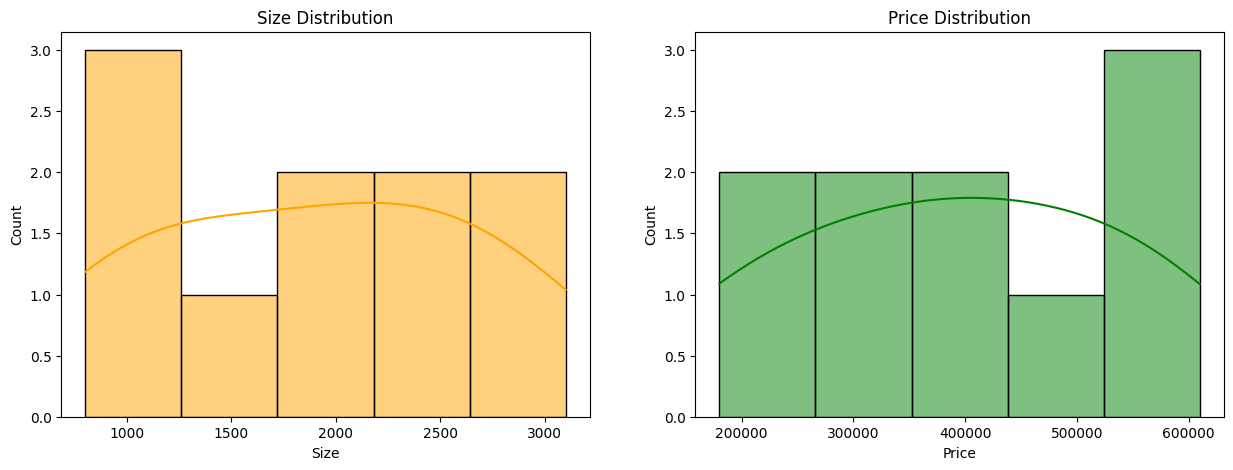

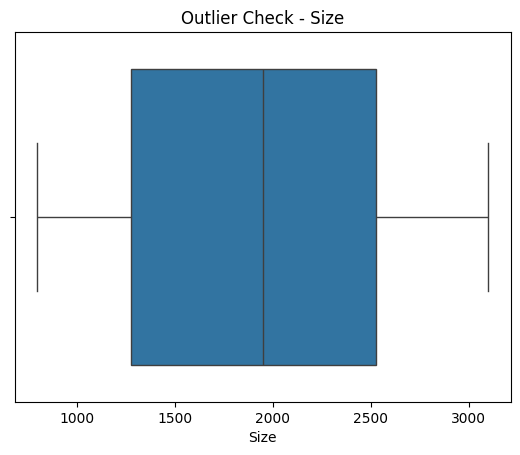

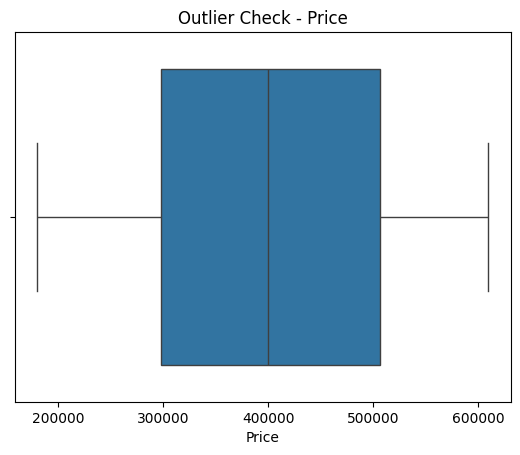

In [4]:
# Distribution Plots
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df['Size'], kde=True, color='orange')
plt.title('Size Distribution')

plt.subplot(1,2,2)
sns.histplot(df['Price'], kde=True, color='green')
plt.title('Price Distribution')

plt.show()

# Outlier Check
sns.boxplot(x=df['Size'])
plt.title('Outlier Check - Size')
plt.show()

sns.boxplot(x=df['Price'])
plt.title('Outlier Check - Price')
plt.show()


In [5]:
# Scaling Numerical Features
scaler = StandardScaler()
df[['Size', 'Number of Rooms']] = scaler.fit_transform(df[['Size', 'Number of Rooms']])

# Encoding Categorical Feature - Location (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

print("\nProcessed Data:")
print(df.head())




Processed Data:
       Size  Number of Rooms   Price  Location_suburban  Location_urban
0 -0.547934        -0.359211  320000              False            True
1  0.521206         0.538816  450000               True           False
2 -1.483432        -1.257237  180000              False           False
3 -0.080186        -0.359211  375000              False            True
4  0.922134         1.436842  525000               True           False


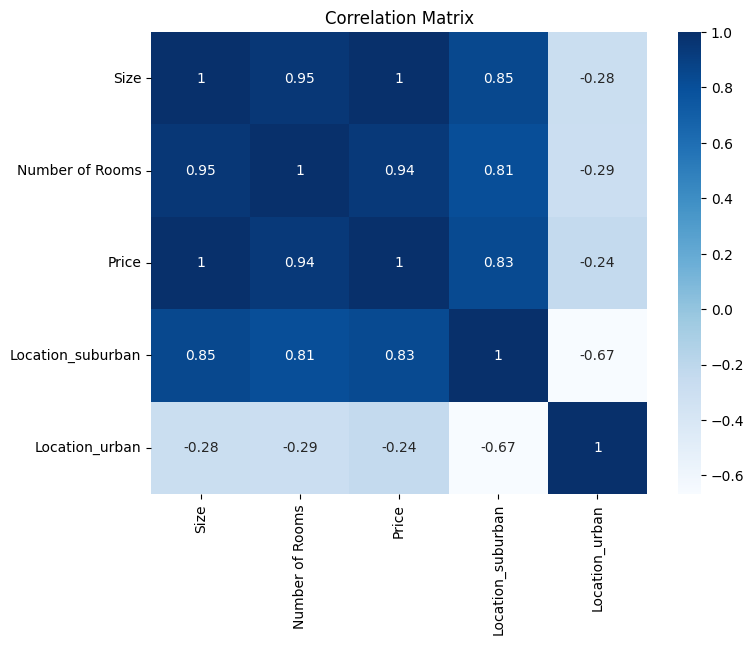


Correlation with Price:
Price                1.000000
Size                 0.995963
Number of Rooms      0.938226
Location_suburban    0.833487
Location_urban      -0.239390
Name: Price, dtype: float64


In [6]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

# Display Correlation with Price
print("\nCorrelation with Price:")
print(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))


In [7]:
# Features and Target
X = df.drop('Price', axis=1)
y = df['Price']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# Predictions
y_pred = model.predict(X_test)

# RMSE Calculation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nRoot Mean Square Error (RMSE): {rmse:.2f}")
print(f"R² (Coefficient of Determination): {r2:.2f}")



Root Mean Square Error (RMSE): 36322.85
R² (Coefficient of Determination): -7.44


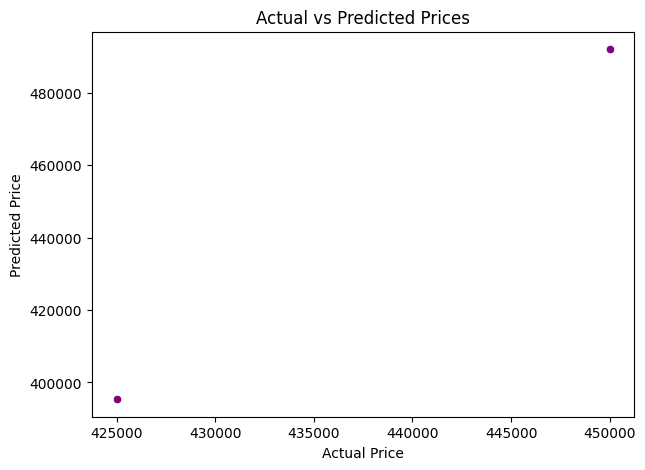

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()


In [10]:
# Coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nFeature Coefficients:")
print(coefficients.sort_values(ascending=False))



Feature Coefficients:
Size                 118267.917979
Location_suburban    102617.220801
Location_urban        45541.346974
Number of Rooms      -14410.684233
dtype: float64
